In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df = pd.read_csv("Caravan-2.csv")

In [3]:
df.head()

Unnamed: 0  MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  \
0           1       33         1        3         2         8       0       5   
1           2       37         1        2         2         8       1       4   
2           3       37         1        2         2         8       0       4   
3           4        9         1        3         3         3       2       3   
4           5       40         1        4         2        10       1       4   

   MGODOV  MGODGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       1       3  ...         0        0        0       1        0         0   
1       1       4  ...         0        0        0       1        0         0   
2       2       4  ...         0        0        0       1        0         0   
3       2       4  ...         0        0        0       1        0         0   
4       1       4  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  Purchase  
0       0        0         0        No  
1       0        0         0        No  
2       0        0         0        No  
3       0        0         0        No  
4       0        0         0        No  

[5 rows x 87 columns]

In [4]:
# check for Missing/NaN value
sum(df.isna().sum())

0

In [5]:
# drop unwanted columns
df = df.drop(columns='Unnamed: 0')

In [6]:
# check for object column
df.select_dtypes('object').columns

Index(['Purchase'], dtype='object')

# Data balancing check

In [7]:
# check for counts of yes,No
df['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

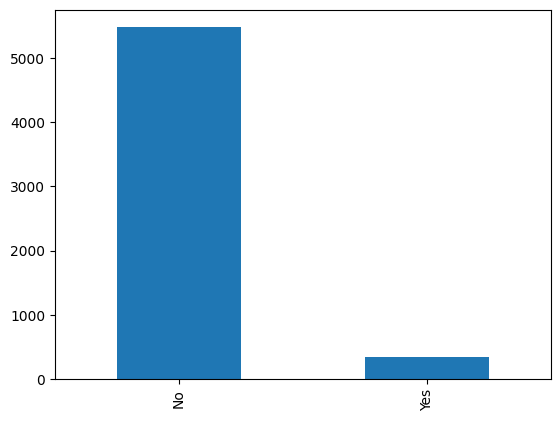

In [8]:
df['Purchase'].value_counts().plot(kind='bar')
plt.show()

- Therefore we need to balance the training part of data

# Get X and Y

In [9]:
# get x and y
X = df.drop(columns=['Purchase'])
y = df['Purchase']

In [10]:
# modify these columns to ohehot encoding
cols = ['MGEMLEEF' ,'MOSHOOFD', 'MGODRK','PWAPART','MOSTYPE']
X = pd.get_dummies(X,columns=cols)

In [11]:
from sklearn.model_selection import train_test_split

# split the data into train and test of 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Now balance the training data using SMOTE library

In [12]:
# import SMOTE, if not installed, this will install first
try:
    from imblearn.over_sampling import SMOTE
except:
    !pip install imbalanced-learn
    from imblearn.over_sampling import SMOTE

In [13]:
# perform oversampling to balance the minority class ie Yes
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

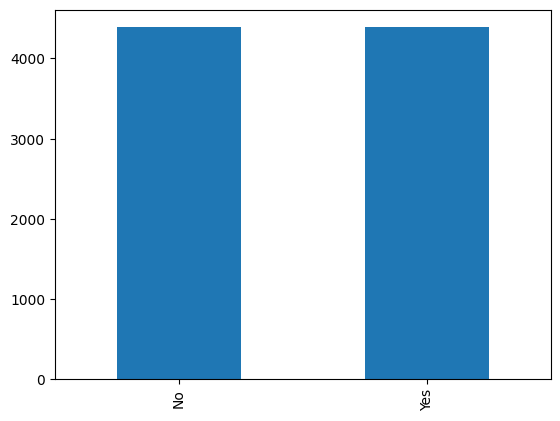

In [14]:
y_resampled_series = pd.Series(y_resampled)
y_resampled_series.value_counts().plot(kind='bar')
plt.show()

# A:- KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,recall_score,f1_score,precision_score

In [16]:
def get_result(y_test,y_pred):
    print('******************* classification_report *********************')
    print(classification_report(y_test,y_pred))
    print('recall_score:',recall_score(y_test,y_pred,pos_label='Yes'))
    print('precision_score:',precision_score(y_test,y_pred,pos_label='Yes'))
    print('f1_score:',f1_score(y_test,y_pred,pos_label='Yes'))

In [17]:
# K=1

k=1
clf_knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
clf_knn.fit(X_resampled, y_resampled)
y_pred = clf_knn.predict(X_test)
get_result(y_test,y_pred)

******************* classification_report *********************
              precision    recall  f1-score   support

          No       0.93      0.92      0.93      1084
         Yes       0.10      0.11      0.10        81

    accuracy                           0.87      1165
   macro avg       0.51      0.52      0.52      1165
weighted avg       0.87      0.87      0.87      1165

recall_score: 0.1111111111111111
precision_score: 0.09574468085106383
f1_score: 0.10285714285714286


In [18]:
# K=3

k=3
clf_knn = KNeighborsClassifier(n_neighbors=k)
clf_knn.fit(X_resampled, y_resampled)
y_pred = clf_knn.predict(X_test)
get_result(y_test,y_pred)

******************* classification_report *********************
              precision    recall  f1-score   support

          No       0.94      0.89      0.91      1084
         Yes       0.12      0.20      0.15        81

    accuracy                           0.84      1165
   macro avg       0.53      0.54      0.53      1165
weighted avg       0.88      0.84      0.86      1165

recall_score: 0.19753086419753085
precision_score: 0.11678832116788321
f1_score: 0.14678899082568808


In [19]:
# K=5

k=5
clf_knn = KNeighborsClassifier(n_neighbors=k)
clf_knn.fit(X_resampled, y_resampled)
y_pred = clf_knn.predict(X_test)
get_result(y_test,y_pred)

******************* classification_report *********************
              precision    recall  f1-score   support

          No       0.94      0.84      0.89      1084
         Yes       0.12      0.31      0.18        81

    accuracy                           0.80      1165
   macro avg       0.53      0.57      0.53      1165
weighted avg       0.89      0.80      0.84      1165

recall_score: 0.30864197530864196
precision_score: 0.125
f1_score: 0.17793594306049823


__Comment on Precision:__

__k=1 Precision (0.095)__: This indicates that when considering only the nearest neighbor (k=1), the classifier is not very precise in correctly predicting instances of the positive class. It has a relatively low precision, suggesting that there are a considerable number of false positives.

__k=3 Precision (0.116)__: With k=3, the precision slightly increases, but it's still relatively low. The model is becoming a bit more conservative in predicting the positive class, leading to a slightly higher precision compared to k=1.

__k=5 Precision (0.125)__: As you increase the number of neighbors to 5, the precision further improves. The model considers more neighbors, which helps in reducing the impact of noise or outliers. This results in a higher precision, indicating a better ability to correctly identify instances of the positive class.

# B:-  SGD

In [20]:
from sklearn.linear_model import SGDClassifier

In [21]:
clf_sgd = SGDClassifier(random_state=42)
clf_sgd.fit(X_resampled, y_resampled)
y_pred = clf_sgd.predict(X_test)
get_result(y_test,y_pred)

******************* classification_report *********************
              precision    recall  f1-score   support

          No       0.94      0.89      0.91      1084
         Yes       0.13      0.22      0.16        81

    accuracy                           0.84      1165
   macro avg       0.53      0.55      0.54      1165
weighted avg       0.88      0.84      0.86      1165

recall_score: 0.2222222222222222
precision_score: 0.1267605633802817
f1_score: 0.16143497757847533


# C

__KNN (k=1) - F1-score: 0.102:__
Relatively low F1-score, indicating a suboptimal balance between precision and recall.
Sensitive to noise or outliers due to the small number of neighbors considered.

__KNN (k=3) - F1-score: 0.146:__
Slightly higher F1-score compared to k=1, but still relatively low.
The model might be improving in capturing some patterns, but the overall performance is limited.

__KNN (k=5) - F1-score: 0.177:__
Higher F1-score compared to k=1 and k=3.
Indicates better balance between precision and recall, suggesting a more robust performance.

__SGDClassifier - F1-score: 0.161:__
High F1-score as compared to K=1 and K=3
Indicates better performance, able to capture patterns or generalize from the data.

Among the classifiers, the KNN classifier with __k=5__ appears to perform relatively better in terms of finding patterns in the dataset, as indicated by the higher F1-score.